Adapted from [Hands On Image Processing with Python](https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python)

In [0]:
% matplotlib inline
from matplotlib import pylab as pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, SimilarityTransform, AffineTransform, resize
import cv2
import numpy as np
from skimage import data
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

In [0]:
!git clone https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python.git

Cloning into 'Hands-On-Image-Processing-with-Python'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 725 (delta 1), reused 1 (delta 0), pack-reused 719
Receiving objects: 100% (725/725), 237.23 MiB | 12.91 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Checking out files: 100% (182/182), done.


In [0]:
IMAGE_DIR = '/content/Hands-On-Image-Processing-with-Python/images/'

(256, 256) 2048


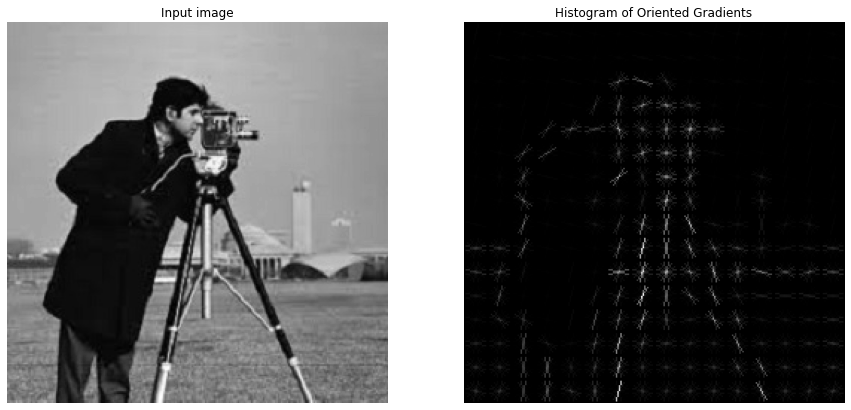

In [0]:
from skimage.feature import hog
from skimage import exposure
image = rgb2gray(imread(IMAGE_DIR+'/cameraman.jpg'))
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
cells_per_block=(1, 1), visualize=True)
print(image.shape, len(fd))
# ((256L, 256L), 2048)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
axes1.axis('off'), axes1.imshow(image, cmap=pylab.cm.gray), axes1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
axes2.axis('off'), axes2.imshow(hog_image_rescaled, cmap=pylab.cm.gray),
axes2.set_title('Histogram of Oriented Gradients')
pylab.show()

In [0]:
!git clone https://github.com/PacktPublishing/Python-Image-Processing-Cookbook.git

Cloning into 'Python-Image-Processing-Cookbook'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 2642 (delta 24), reused 28 (delta 11), pack-reused 2592
Receiving objects: 100% (2642/2642), 1.25 GiB | 32.86 MiB/s, done.
Resolving deltas: 100% (493/493), done.
Checking out files: 100% (1078/1078), done.


In [0]:
!wget http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz

--2020-06-02 01:46:04--  http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131740031 (126M) [application/x-tar]
Saving to: ‘101_ObjectCategories.tar.gz’

101_ObjectCategorie 100%[===================>] 125.64M  8.79MB/s    in 15s     

2020-06-02 01:46:19 (8.44 MB/s) - ‘101_ObjectCategories.tar.gz’ saved [131740031/131740031]



In [0]:
!tar xzvf 101*.tar.gz

Streaming output truncated to the last 5000 lines.
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jpg
101_ObjectCategories/chair/image_0031.jpg
101_ObjectCategories/chai

In [0]:
IMAGE_DIR = '/content/101_ObjectCategories'

In [0]:
glob(IMAGE_DIR + '/*')

['/content/101_ObjectCategories/chair',
 '/content/101_ObjectCategories/trilobite',
 '/content/101_ObjectCategories/starfish',
 '/content/101_ObjectCategories/mandolin',
 '/content/101_ObjectCategories/llama',
 '/content/101_ObjectCategories/schooner',
 '/content/101_ObjectCategories/water_lilly',
 '/content/101_ObjectCategories/kangaroo',
 '/content/101_ObjectCategories/elephant',
 '/content/101_ObjectCategories/car_side',
 '/content/101_ObjectCategories/pagoda',
 '/content/101_ObjectCategories/cougar_face',
 '/content/101_ObjectCategories/gramophone',
 '/content/101_ObjectCategories/sea_horse',
 '/content/101_ObjectCategories/electric_guitar',
 '/content/101_ObjectCategories/butterfly',
 '/content/101_ObjectCategories/cellphone',
 '/content/101_ObjectCategories/soccer_ball',
 '/content/101_ObjectCategories/scissors',
 '/content/101_ObjectCategories/cannon',
 '/content/101_ObjectCategories/umbrella',
 '/content/101_ObjectCategories/Leopards',
 '/content/101_ObjectCategories/crayfish',

In [0]:
# http://www.vision.caltech.edu/Image_Datasets/Caltech101/
# https://www.kaggle.com/manikg/training-svm-classifier-with-hog-features
%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
from skimage.transform import resize
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from glob import glob
from matplotlib import pyplot as plt

active_classes = set(['brain','buddha','butterfly','chair','elephant','laptop','piano','pigeon','pizza','pyramid','rhino','sunflower'])

images, hog_images = [], []
X, y = [], []
ppc = 16
sz = 200
for dir in glob(IMAGE_DIR + '/*'):
    image_files = glob(dir + '/*.jpg')
    label = dir.split('/')[-1]
    if label not in active_classes:
      continue
    print(label, len(image_files))
    for image_file in image_files:
        image = resize(imread(image_file), (sz,sz))
        if len(image.shape) == 2: # if a gray-scale image
            image = gray2rgb(image)
        fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True, multichannel=True)
        images.append(image)
        hog_images.append(hog_image)
        X.append(fd)
        y.append(label)

chair 62
elephant 64
butterfly 91
rhino 59
laptop 81
sunflower 85
pizza 53
pigeon 45
buddha 85
pyramid 57
brain 98


In [0]:
print(len(images), hog_images[0].shape, X[0].shape, X[1].shape, len(y))

780 (200, 200) (10368,) (10368,) 780


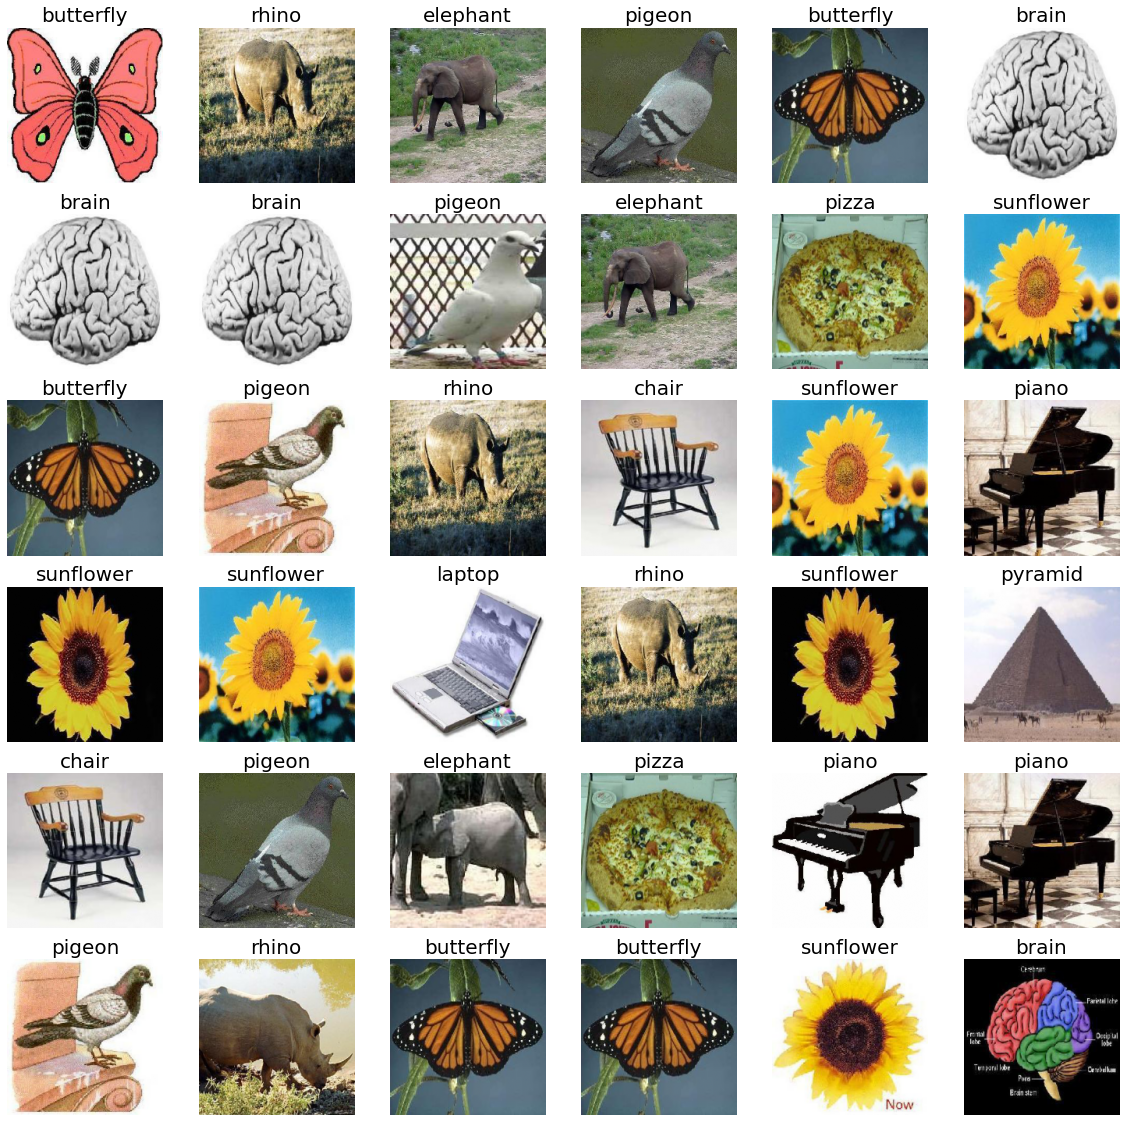

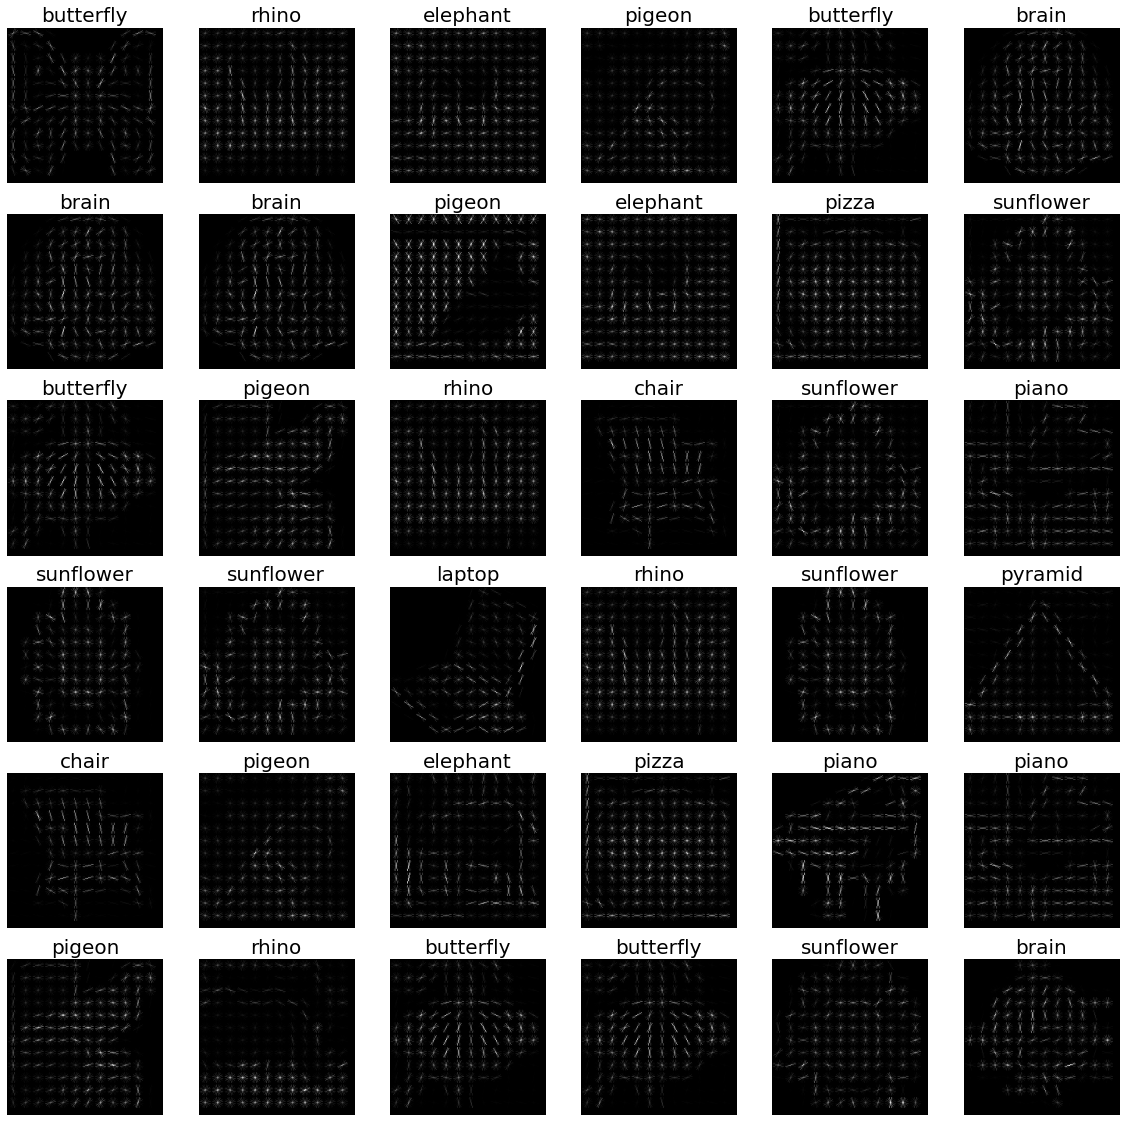

In [0]:
n = 6
indices = np.random.choice(len(images), n*n)
plt.figure(figsize=(20,20))
plt.gray()
i = 1
for index in indices:
    plt.subplot(n,n,i), plt.imshow(images[index]), plt.axis('off'), plt.title(y[index], size=20)
    i += 1
plt.show()
plt.figure(figsize=(20,20))
i = 1
for index in indices:
    plt.subplot(n,n,i), plt.imshow(hog_images[index]), plt.axis('off'), plt.title(y[index], size=20)
    i += 1
plt.show()

In [0]:
X = np.array(X)
y = np.array(y)
indices = np.arange(len(X))
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, indices, test_size=0.1, random_state=1)

In [0]:
#clf = svm.LinearSVC(C=10)
clf = LogisticRegression(C=1000, random_state=0, solver='lbfgs', max_iter=10000,multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(X.shape, y.shape)

(780, 10368) (780,)


In [0]:
y_pred = clf.predict(X_train)
print("Accuracy: " + str(accuracy_score(y_train, y_pred)))
print('\n')
print(classification_report(y_train, y_pred))

Accuracy: 1.0


              precision    recall  f1-score   support

       brain       1.00      1.00      1.00        89
      buddha       1.00      1.00      1.00        72
   butterfly       1.00      1.00      1.00        85
       chair       1.00      1.00      1.00        54
    elephant       1.00      1.00      1.00        58
      laptop       1.00      1.00      1.00        73
      pigeon       1.00      1.00      1.00        40
       pizza       1.00      1.00      1.00        50
     pyramid       1.00      1.00      1.00        52
       rhino       1.00      1.00      1.00        54
   sunflower       1.00      1.00      1.00        75

    accuracy                           1.00       702
   macro avg       1.00      1.00      1.00       702
weighted avg       1.00      1.00      1.00       702



In [0]:
y_pred = clf.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334


              precision    recall  f1-score   support

       brain       0.75      1.00      0.86         9
      buddha       0.76      1.00      0.87        13
   butterfly       0.83      0.83      0.83         6
       chair       1.00      0.62      0.77         8
    elephant       1.00      0.50      0.67         6
      laptop       0.89      1.00      0.94         8
      pigeon       0.75      0.60      0.67         5
       pizza       1.00      0.67      0.80         3
     pyramid       0.67      0.80      0.73         5
       rhino       0.83      1.00      0.91         5
   sunflower       1.00      0.80      0.89        10

    accuracy                           0.83        78
   macro avg       0.86      0.80      0.81        78
weighted avg       0.86      0.83      0.83        78



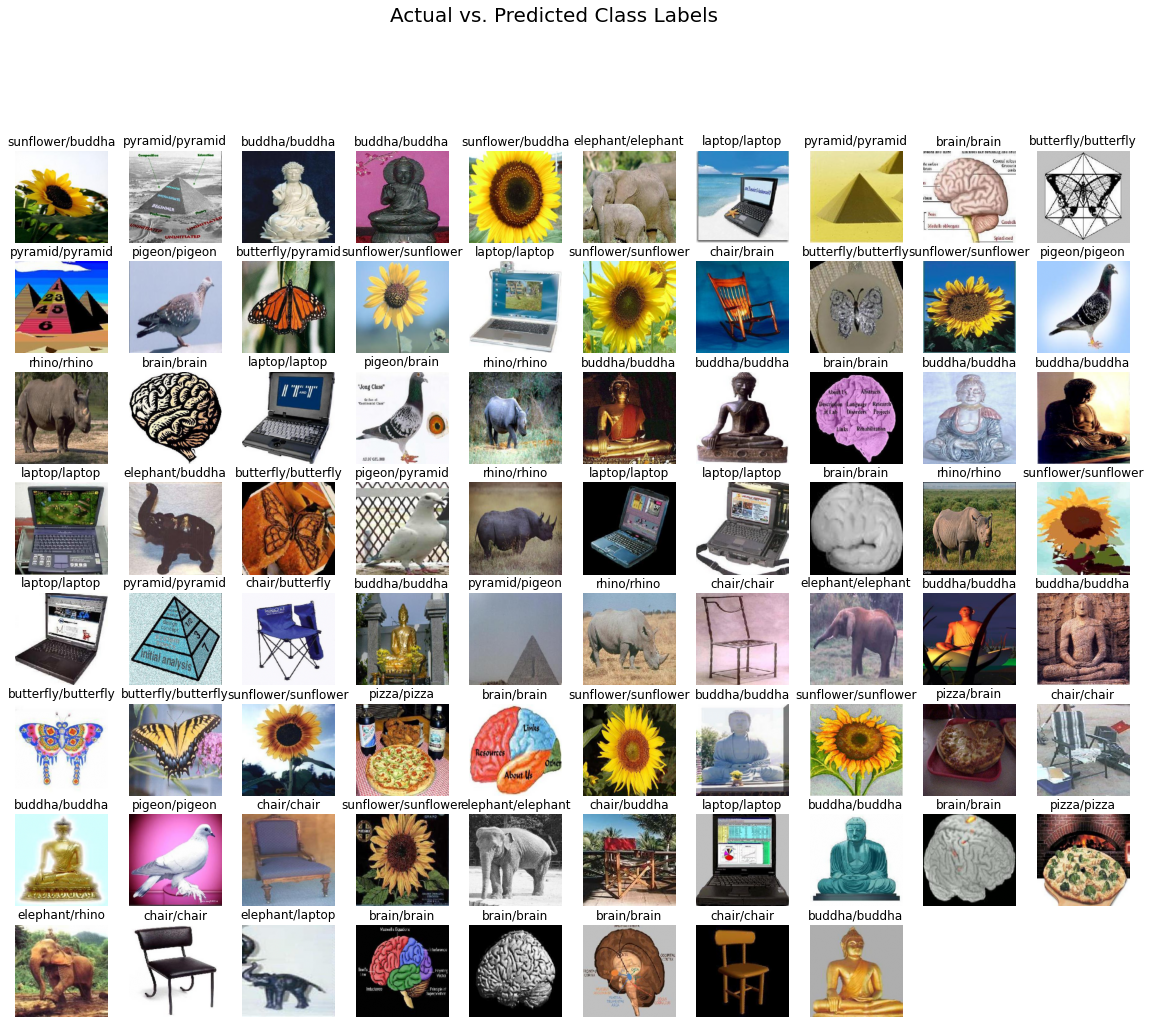

In [0]:
plt.figure(figsize=(20,20))
j = 0
for i in id_test:
    plt.subplot(10,10,j+1), plt.imshow(images[i]), plt.axis('off'), plt.title('{}/{}'.format(y_test[j], y_pred[j]))
    j += 1
plt.suptitle('Actual vs. Predicted Class Labels', size=20)
plt.show()

## **Sobel operator**

Adapted from [Lil'Log](https://lilianweng.github.io/lil-log/2017/10/29/object-recognition-for-dummies-part-1.html)

In [0]:
import numpy as np
import scipy.signal as sig
from skimage import io
from urllib.request import urlopen
from matplotlib import pyplot as plt
from functools import reduce
import cv2
from skimage import feature
from skimage import exposure

In [0]:
# With mode="L", we force the image to be parsed in the grayscale, so it is
# actually unnecessary to convert the photo color beforehand.
url = 'https://lilianweng.github.io/lil-log/assets/data/manu-2004.jpg'
img = io.imread(url,as_gray=True)

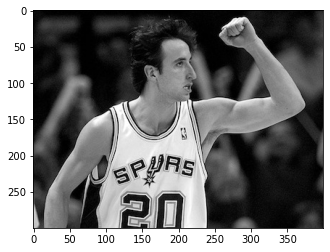

In [0]:
plt.imshow(img,cmap='gray')

In [0]:
# Define the Sobel operator kernels.
kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

G_x = sig.convolve2d(img, kernel_x, mode='same') 
G_y = sig.convolve2d(img, kernel_y, mode='same') 

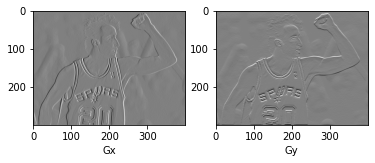

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Actually plt.imshow() can handle the value scale well even if I don't do 
# the transformation (G_x + 255) / 2.
ax1.imshow((G_x + 255) / 2, cmap='gray'); ax1.set_xlabel("Gx")
ax2.imshow((G_y + 255) / 2, cmap='gray'); ax2.set_xlabel("Gy")
plt.show()

In [0]:
N_BUCKETS = 9
CELL_SIZE = 8  # Each cell is 8x8 pixels
BLOCK_SIZE = 2  # Each block is 2x2 cells

def assign_bucket_vals(m, d, bucket_vals):
    left_bin = int(d / 20.)
    # Handle the case when the direction is between [160, 180)
    right_bin = (int(d / 20.) + 1) % N_BUCKETS
    assert 0 <= left_bin < right_bin < N_BUCKETS

    left_val= m * (right_bin * 20 - d) / 20
    right_val = m * (d - left_bin * 20) / 20
    bucket_vals[left_bin] += left_val
    bucket_vals[right_bin] += right_val

def get_magnitude_hist_cell(loc_x, loc_y):
    # (loc_x, loc_y) defines the top left corner of the target cell.
    cell_x = G_x[loc_x:loc_x + CELL_SIZE, loc_y:loc_y + CELL_SIZE]
    cell_y = G_y[loc_x:loc_x + CELL_SIZE, loc_y:loc_y + CELL_SIZE]
    magnitudes = np.sqrt(cell_x * cell_x + cell_y * cell_y)
    directions = np.abs(np.arctan(cell_y / cell_x) * 180 / np.pi)
    
    buckets = np.linspace(0, 180, N_BUCKETS + 1)
    bucket_vals = np.zeros(N_BUCKETS)
    list(map(lambda t: assign_bucket_vals(t[0], t[1], bucket_vals), zip(magnitudes.flatten(), directions.flatten())))
    return bucket_vals

def get_magnitude_hist_block(loc_x, loc_y):
    # (loc_x, loc_y) defines the top left corner of the target block.
    return reduce(
        lambda arr1, arr2: np.concatenate((arr1, arr2)),
        [get_magnitude_hist_cell(x, y) for x, y in zip(
            [loc_x, loc_x + CELL_SIZE, loc_x, loc_x + CELL_SIZE],
            [loc_y, loc_y, loc_y + CELL_SIZE, loc_y + CELL_SIZE],
        )]
    )

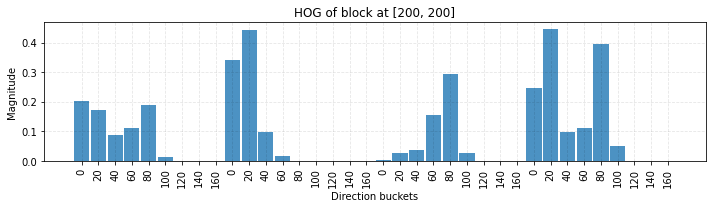

In [0]:
# Random location [200, 200] as an example.
loc_x = loc_y = 200

ydata = get_magnitude_hist_block(loc_x, loc_y)
ydata = ydata / np.linalg.norm(ydata)

xdata = range(len(ydata))
bucket_names = np.tile(np.arange(N_BUCKETS), BLOCK_SIZE * BLOCK_SIZE)

assert len(ydata) == N_BUCKETS * (BLOCK_SIZE * BLOCK_SIZE)
assert len(bucket_names) == len(ydata)

plt.figure(figsize=(10, 3))
plt.bar(xdata, ydata, align='center', alpha=0.8, width=0.9)
plt.xticks(xdata, bucket_names * 20, rotation=90)
plt.xlabel('Direction buckets')
plt.ylabel('Magnitude')
plt.grid(ls='--', color='k', alpha=0.1)
plt.title("HOG of block at [%d, %d]" % (loc_x, loc_y))
plt.tight_layout()

In [0]:
img = io.imread(url)
img = np.float32(img) / 255.0
# Calculate gradient
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

In [0]:
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

In [0]:
(H, hogImage) = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),	cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1",	visualize=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")

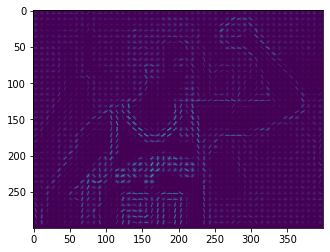

In [0]:
plt.imshow(hogImage)